In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
stock = '^VIX'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0


In [30]:
price = data['Close']
price

Date
2010-01-04    20.040001
2010-01-05    19.350000
2010-01-06    19.160000
2010-01-07    19.059999
2010-01-08    18.129999
                ...    
2023-05-08    16.980000
2023-05-09    17.709999
2023-05-10    16.940001
2023-05-11    16.930000
2023-05-12    17.030001
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

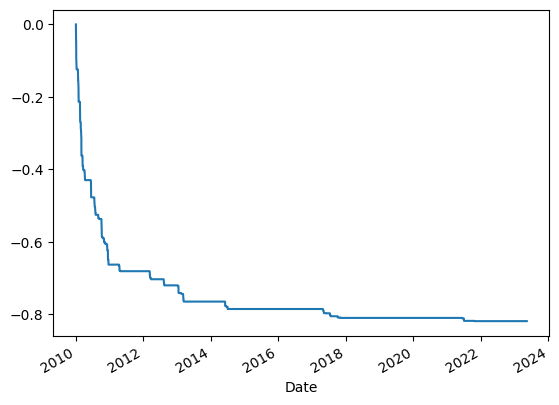

In [31]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [32]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -81.8478657809717 %


In [33]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns


array([ 0.        , -0.03443116, -0.00981915, ..., -0.04347818,
       -0.00059033,  0.0059067 ])

In [34]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.96556884, 0.95608777, ..., 0.84530937, 0.84481036,
       0.84980039])

In [35]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 84.98003946422175%


In [36]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.318310
2012-12-31   -0.229914
2013-12-31   -0.238624
2014-12-31    0.399417
2015-12-31   -0.051563
2016-12-31   -0.228995
2017-12-31   -0.213675
2018-12-31    1.302536
2019-12-31   -0.457907
2020-12-31    0.650943
2021-12-31   -0.243077
2022-12-31    0.258420
2023-12-31   -0.214121
Freq: A-DEC, Name: Close, dtype: float64

In [37]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.207961
2010-03-31   -0.097949
2010-04-30    0.253553
2010-05-31    0.454422
                ...   
2023-01-31   -0.104753
2023-02-28    0.067010
2023-03-31   -0.096618
2023-04-30   -0.156150
2023-05-31    0.079214
Freq: M, Name: Close, Length: 161, dtype: float64

In [38]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 8.090391319928191%


In [39]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 0.40680784528685143


In [40]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.207961
2010-03-31   -0.097949
2010-07-31   -0.319629
2010-09-30   -0.090211
2010-10-31   -0.105485
                ...   
2022-10-31   -0.181531
2022-11-30   -0.204791
2023-01-31   -0.104753
2023-03-31   -0.096618
2023-04-30   -0.156150
Name: Close, Length: 84, dtype: float64

In [41]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 1.0154789124446524
